<a href="https://colab.research.google.com/github/chrisguti27/Notebooks/blob/main/AI/Machine%20Learning/Regresi%C3%B3n/LinealPolinomica/RegresionPolinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cd ..
!ls
!git clone https://github.com/chrisguti27/Notebooks.git

sample_data
Cloning into 'Notebooks'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 280 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (280/280), 99.73 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (35/35), done.


**REGRESIÓN LINEAL POLINÓMICA**

El modelo de regresión lineal ajusta el dataset al modelo de la forma:

$y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_1^2 + \cdots + b_n \cdot x_1^n$

* El grado del polinomio es dado por el usuario, según se ajuste la curva al comportamiento del dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#-----------------IMPORT DATASET-----------------

dataset = pd.read_csv('/content/Notebooks/AI/Machine Learning/Regresión/LinealPolinomica/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values 
Y = dataset.iloc[:,2].values

Al ser un dataset de pocos datos no tiene sentido dividir el dataset en conjunto de datos de entranamiento y test. Esto sólo se hace debido a la baja cantidad de datos.

In [ ]:
#Ajustar la regresión lineal con el dataset
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Ajustar la regresión polinómica con el dataset
from sklearn.preprocessing import PolynomialFeatures
Poly_reg = PolynomialFeatures(degree = 2) #por defecto genera un pol. de grado 2
X_poly = Poly_reg.fit_transform(X) #se calculan las potencias de X, 
                                    #en este caso (de X^0 a X^2)
lin_reg_2 = LinearRegression() #la misma clase para la regresión polinómica
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

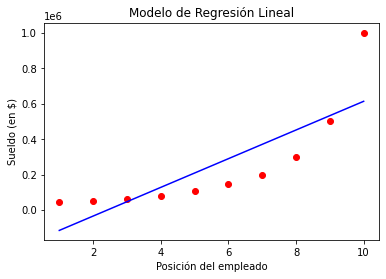

In [ ]:
#Visualización de los resultados del modelo lineal
plt.scatter(X, Y, color = "red")
plt.plot(X, Lin_reg.predict(X), color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

Para estimar los valores del modelo polinómico se debe usar los valores de X_poly *lin_reg_2.predict(X_poly)*

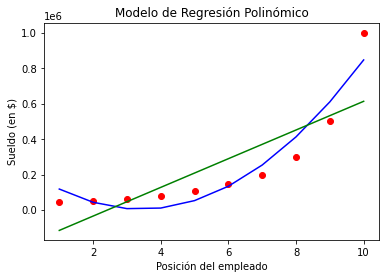

In [ ]:
#Visualización de los resultados del modelo polinómico
plt.scatter(X, Y, color = "red")
plt.plot(X, lin_reg_2.predict(X_poly), color = "blue")
plt.plot(X, Lin_reg.predict(X), color = "green")
plt.title("Modelo de Regresión Polinómico")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

#Ajuste polinómico de grado 4

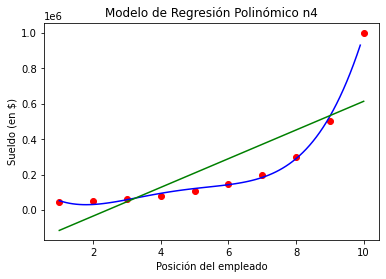

In [ ]:
Poly_reg = PolynomialFeatures(degree = 4) 
X_poly = Poly_reg.fit_transform(X) #(de X^0 a X^3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

X_grid = np.arange(min(X),max(X),0.1)# para evitar que el gráfico salga a trozos
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, Y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(Poly_reg.fit_transform(X_grid)), color = "blue")
plt.plot(X, Lin_reg.predict(X), color = "green")
plt.title("Modelo de Regresión Polinómico n4")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

#Predicción de modelos

In [ ]:
Lin_reg.predict([[6.5]])

array([330378.78787879])

In [ ]:
lin_reg_2.predict(Poly_reg.fit_transform([[6.5]]))

array([158862.45265155])